In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/cleaned_data.csv")

In [3]:
columns_to_drop = ["title", "link", "description", "weight", "processor", "hdd_gb", "ssd_gb", "graphic_card"]
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               302 non-null    float64
 1   brand               302 non-null    object 
 2   resolution          302 non-null    object 
 3   screen_size         302 non-null    float64
 4   level_1_model       302 non-null    object 
 5   processor_speed     302 non-null    float64
 6   ram                 302 non-null    float64
 7   warranty            302 non-null    int64  
 8   hdd_exist           302 non-null    int64  
 9   ssd_exist           302 non-null    int64  
 10  graphic_card_exist  302 non-null    int64  
 11  storage             302 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 28.4+ KB


In [4]:
df.head(10)

,price,brand,resolution,screen_size,level_1_model,processor_speed,ram,warranty,hdd_exist,ssd_exist,graphic_card_exist,storage
0,1230.00,apple,wqxga,13.3,macbook pro,2.6,16.0,1,0,1,0,256.0
1,630.00,dell,fhd,14.0,latitude,2.4,8.0,1,0,1,0,256.0
2,370.00,dell,hd+,14.0,latitude,1.9,8.0,1,1,0,0,500.0
3,310.00,dell,sxga,14.0,inpiron,2.4,4.0,1,1,0,0,500.0
4,395.00,dell,sxga,14.0,inpiron,1.7,4.0,1,1,0,0,500.0
5,315.00,dell,hd,14.0,vostro,2.6,4.0,1,1,0,0,500.0
6,310.00,lenovo,hd,14.0,thinkpad,2.6,4.0,1,0,0,0,0.0
7,420.00,dell,hd,13.3,latitude,2.2,8.0,0,0,1,1,500.0
8,170.00,apple,hd,13.0,macbook air,1.8,8.0,0,0,0,0,0.0
9,1472.12,dell,hd,14.0,latitude,2.0,16.0,0,0,1,0,1024.0


# Encoding

In [5]:
encoded_df = df.copy()

## One-Hot Encoding

In [6]:
columns_to_encode = ["brand", "level_1_model"]
for column_name in columns_to_encode:
    dummies = pd.get_dummies(encoded_df[column_name]).rename(columns=lambda x: column_name + "_" + str(x))
    encoded_df = pd.concat([encoded_df, dummies], axis=1)
    encoded_df = encoded_df.drop(column_name, 1)

## Label Encoding

In [7]:
label_encoding = {"vga": 1, "xga": 2, "hd": 3, "wxga+": 4, "sxga": 5, "hd+": 6, "fhd": 7, "fhd+": 8, "qhd": 9, 
                 "wqhd": 10, "wqxga": 11, "qwxga+": 12, "qhd+": 13, "uhd": 14}
encoded_df["resolution"].replace(label_encoding, inplace=True)

In [8]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            302 non-null    float64
 1   resolution                       302 non-null    int64  
 2   screen_size                      302 non-null    float64
 3   processor_speed                  302 non-null    float64
 4   ram                              302 non-null    float64
 5   warranty                         302 non-null    int64  
 6   hdd_exist                        302 non-null    int64  
 7   ssd_exist                        302 non-null    int64  
 8   graphic_card_exist               302 non-null    int64  
 9   storage                          302 non-null    float64
 10  brand_acer                       302 non-null    uint8  
 11  brand_aftershock                 302 non-null    uint8  
 12  brand_apple           

In [9]:
encoded_df.head(10)

,price,resolution,screen_size,processor_speed,ram,warranty,hdd_exist,ssd_exist,graphic_card_exist,storage,...,level_1_model_travelmate,level_1_model_travelmate p248-m,level_1_model_vivobook,level_1_model_vostro,level_1_model_x201,level_1_model_xg15-v2,level_1_model_xps,level_1_model_yoga,level_1_model_zbook,level_1_model_zenbook
0,1230.00,11,13.3,2.6,16.0,1,0,1,0,256.0,...,0,0,0,0,0,0,0,0,0,0
1,630.00,7,14.0,2.4,8.0,1,0,1,0,256.0,...,0,0,0,0,0,0,0,0,0,0
2,370.00,6,14.0,1.9,8.0,1,1,0,0,500.0,...,0,0,0,0,0,0,0,0,0,0
3,310.00,5,14.0,2.4,4.0,1,1,0,0,500.0,...,0,0,0,0,0,0,0,0,0,0
4,395.00,5,14.0,1.7,4.0,1,1,0,0,500.0,...,0,0,0,0,0,0,0,0,0,0
5,315.00,3,14.0,2.6,4.0,1,1,0,0,500.0,...,0,0,0,1,0,0,0,0,0,0
6,310.00,3,14.0,2.6,4.0,1,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,420.00,3,13.3,2.2,8.0,0,0,1,1,500.0,...,0,0,0,0,0,0,0,0,0,0
8,170.00,3,13.0,1.8,8.0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,1472.12,3,14.0,2.0,16.0,0,0,1,0,1024.0,...,0,0,0,0,0,0,0,0,0,0


# Plot Heatmap

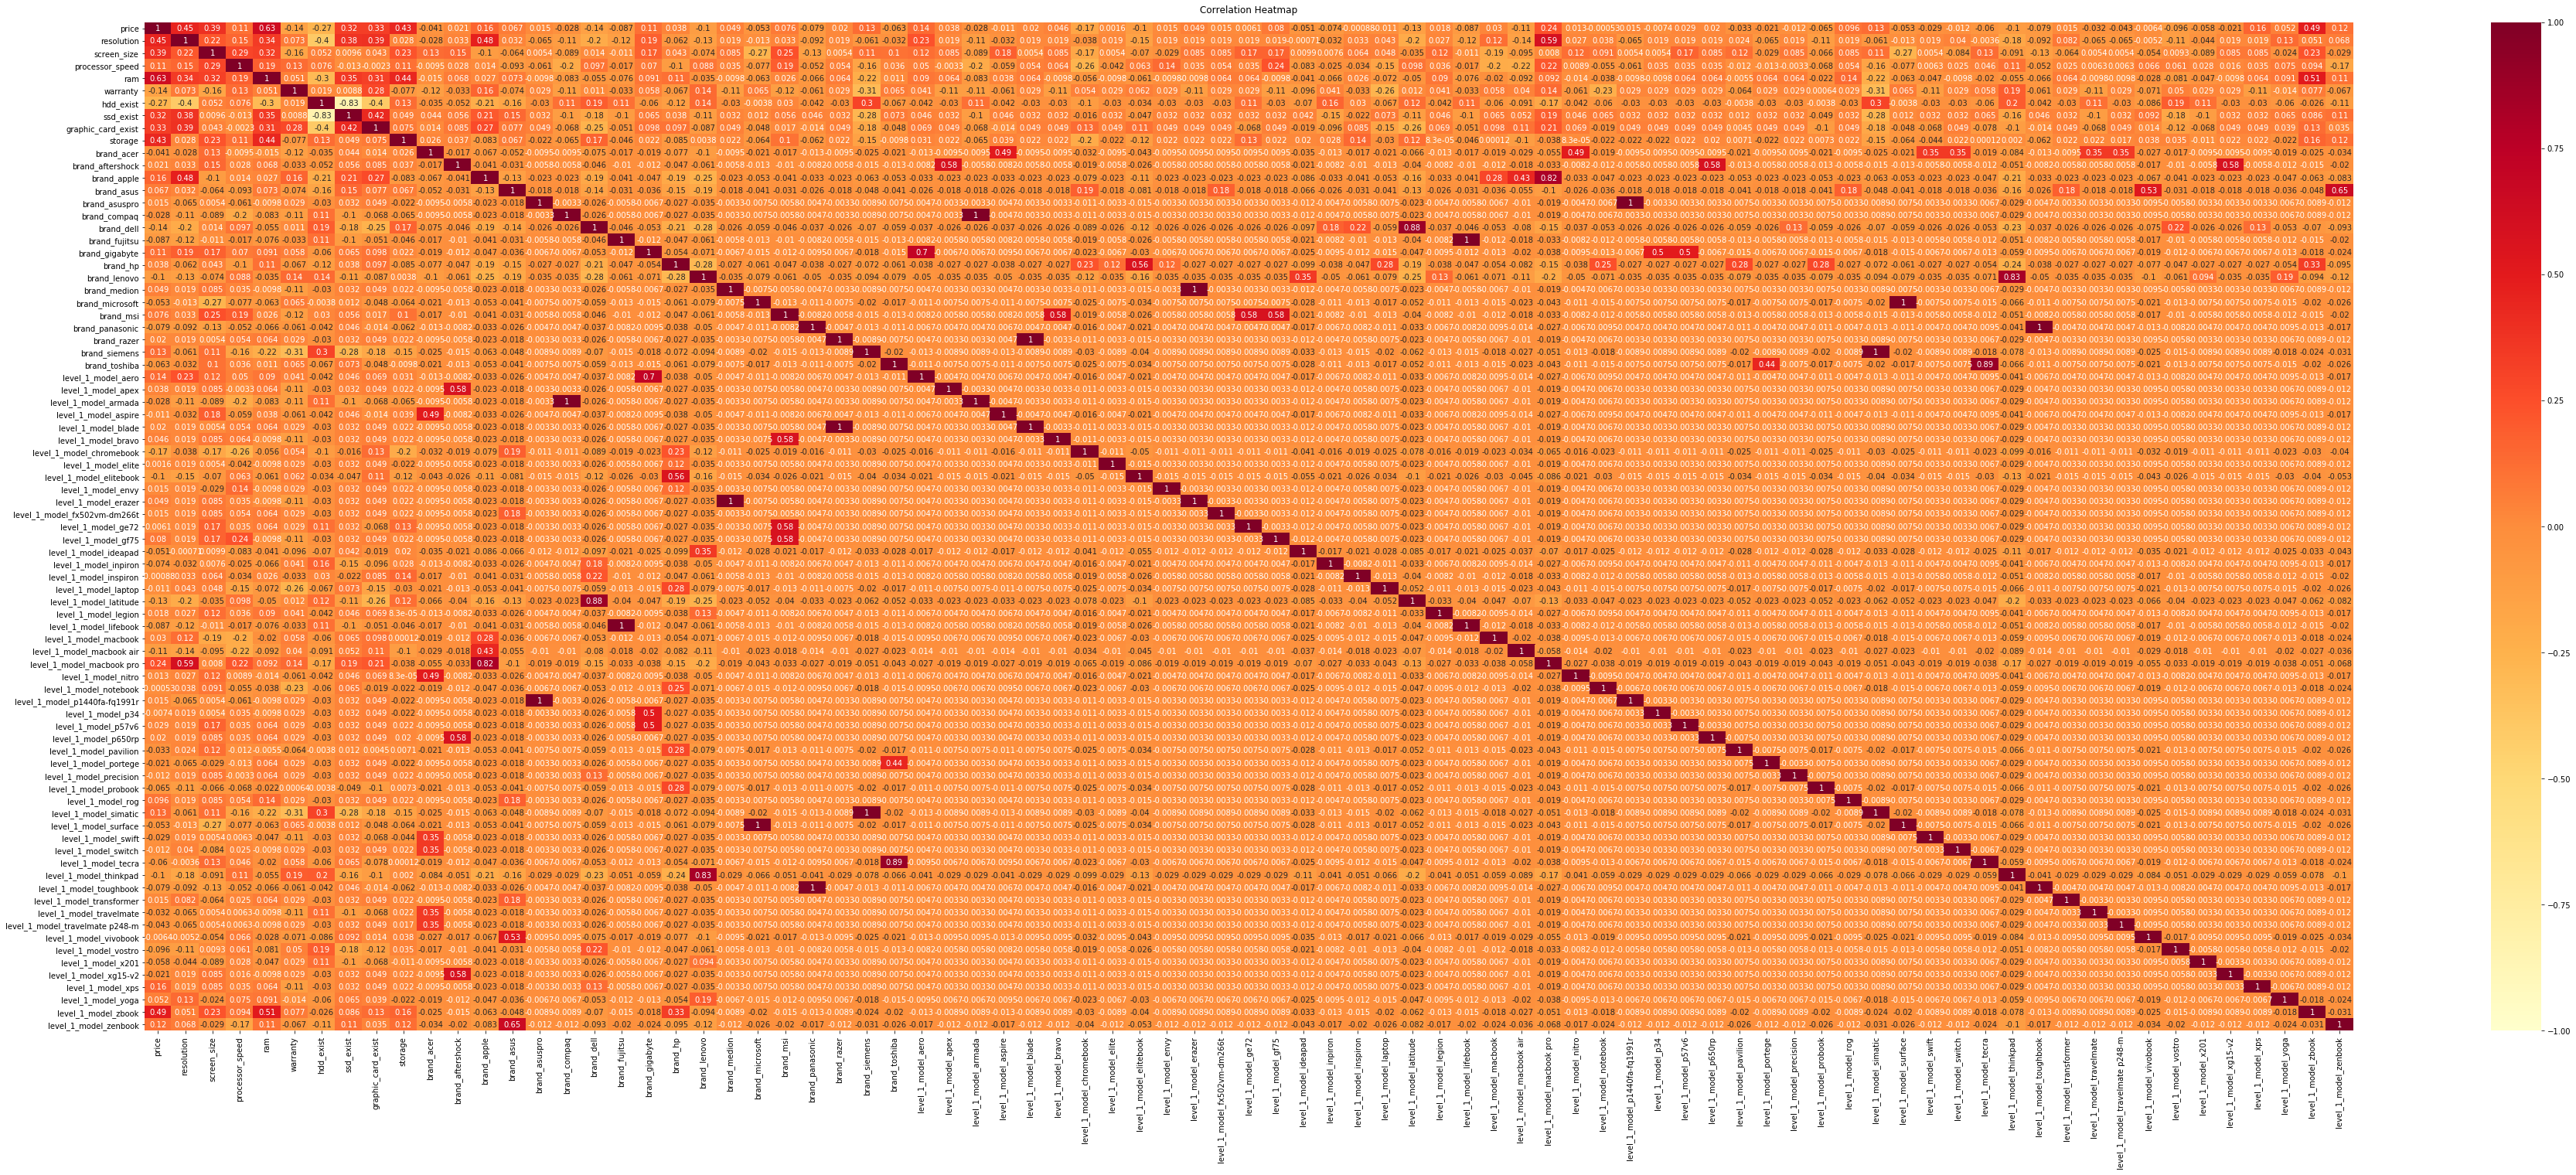

In [10]:
plt.figure(figsize=(64, 24))

# Show correlation between each data values using Pearson Correlation Coefficient (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
heatmap = sns.heatmap(encoded_df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlOrRd")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# Cropped top and bottom part of seaborn heatmap, bug in matplotlib 3.1 (https://github.com/mwaskom/seaborn/issues/1773)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
heatmap

In [11]:
# Save heatmap
figure = heatmap.get_figure()    
figure.savefig('corr_heatmap.png', dpi=80)